<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.6_ttest/stats_ttest_permutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: The t-test family
# Permutation testing


In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

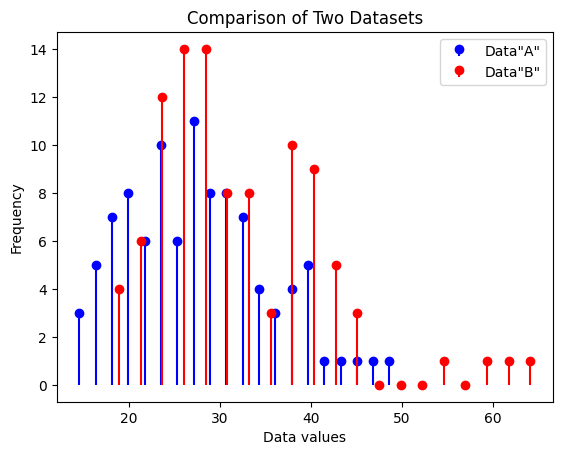

In [7]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
# Adding labels and title
plt.xlabel('Data values')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.legend()
plt.title('Comparison of Two Datasets')  # Title for the plot
plt.show()

In [12]:
## mix trials together

# concatenate trials - pooled data
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))
# so you can track which data point belongs to group "A" (as 1) and which belongs to group "B" (as 2).

In [17]:
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2

# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])


[27.56184754958576, 31.985428805730557]
[29.102063885490782, 30.445212469825528]


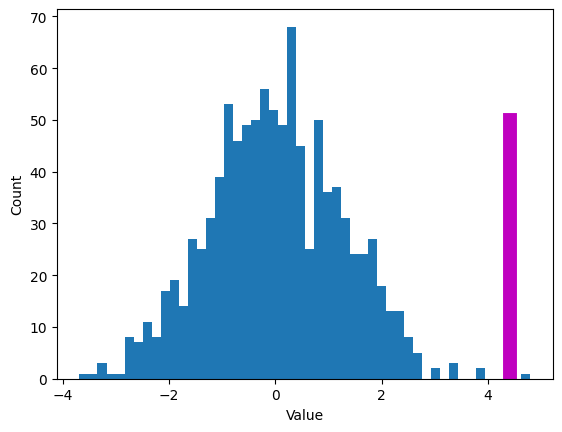

In [30]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [31]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.00021256802822289256 0.001


---
How many permutations?
---

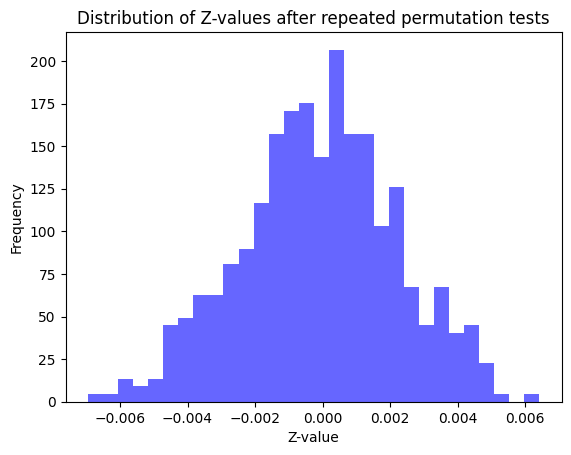

In [32]:

# Number of trials
N = 100

# Generate the original datasets (A and B)
np.random.seed(0)  # For reproducibility
r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
dataA = 26 - r * 10

r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
dataB = 30 - r * 10

# Concatenate both datasets for permutation testing
alldata = np.hstack((dataA, dataB))
conds = np.hstack((np.ones(N), 2*np.ones(N)))

# Function to compute the z-value (difference between means)
def compute_z_value(data, conds):
    mean_diff = np.mean(data[conds == 1]) - np.mean(data[conds == 2])
    pooled_std = np.std(data[conds == 1]) + np.std(data[conds == 2])
    z_value = mean_diff / pooled_std
    return z_value

# Number of permutations and iterations
num_permutations = 1000  # Number of permutations per test
num_repeats = 500  # Number of times to repeat the whole experiment

# Store z-values for each test
z_values = []

# Main loop to repeat the permutation test multiple times
for _ in range(num_repeats):
    z_permutations = []
    for _ in range(num_permutations):
        # Shuffle the labels for permutation testing
        fakeconds = np.random.permutation(N * 2)
        fakeconds[fakeconds < N] = 1
        fakeconds[fakeconds >= N] = 2

        # Compute z-value for the shuffled data
        z = compute_z_value(alldata, fakeconds)
        z_permutations.append(z)

    # Store the mean z-value from this set of permutations
    z_values.append(np.mean(z_permutations))

# Plot the histogram of z-values
plt.hist(z_values, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Z-values after repeated permutation tests')
plt.xlabel('Z-value')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


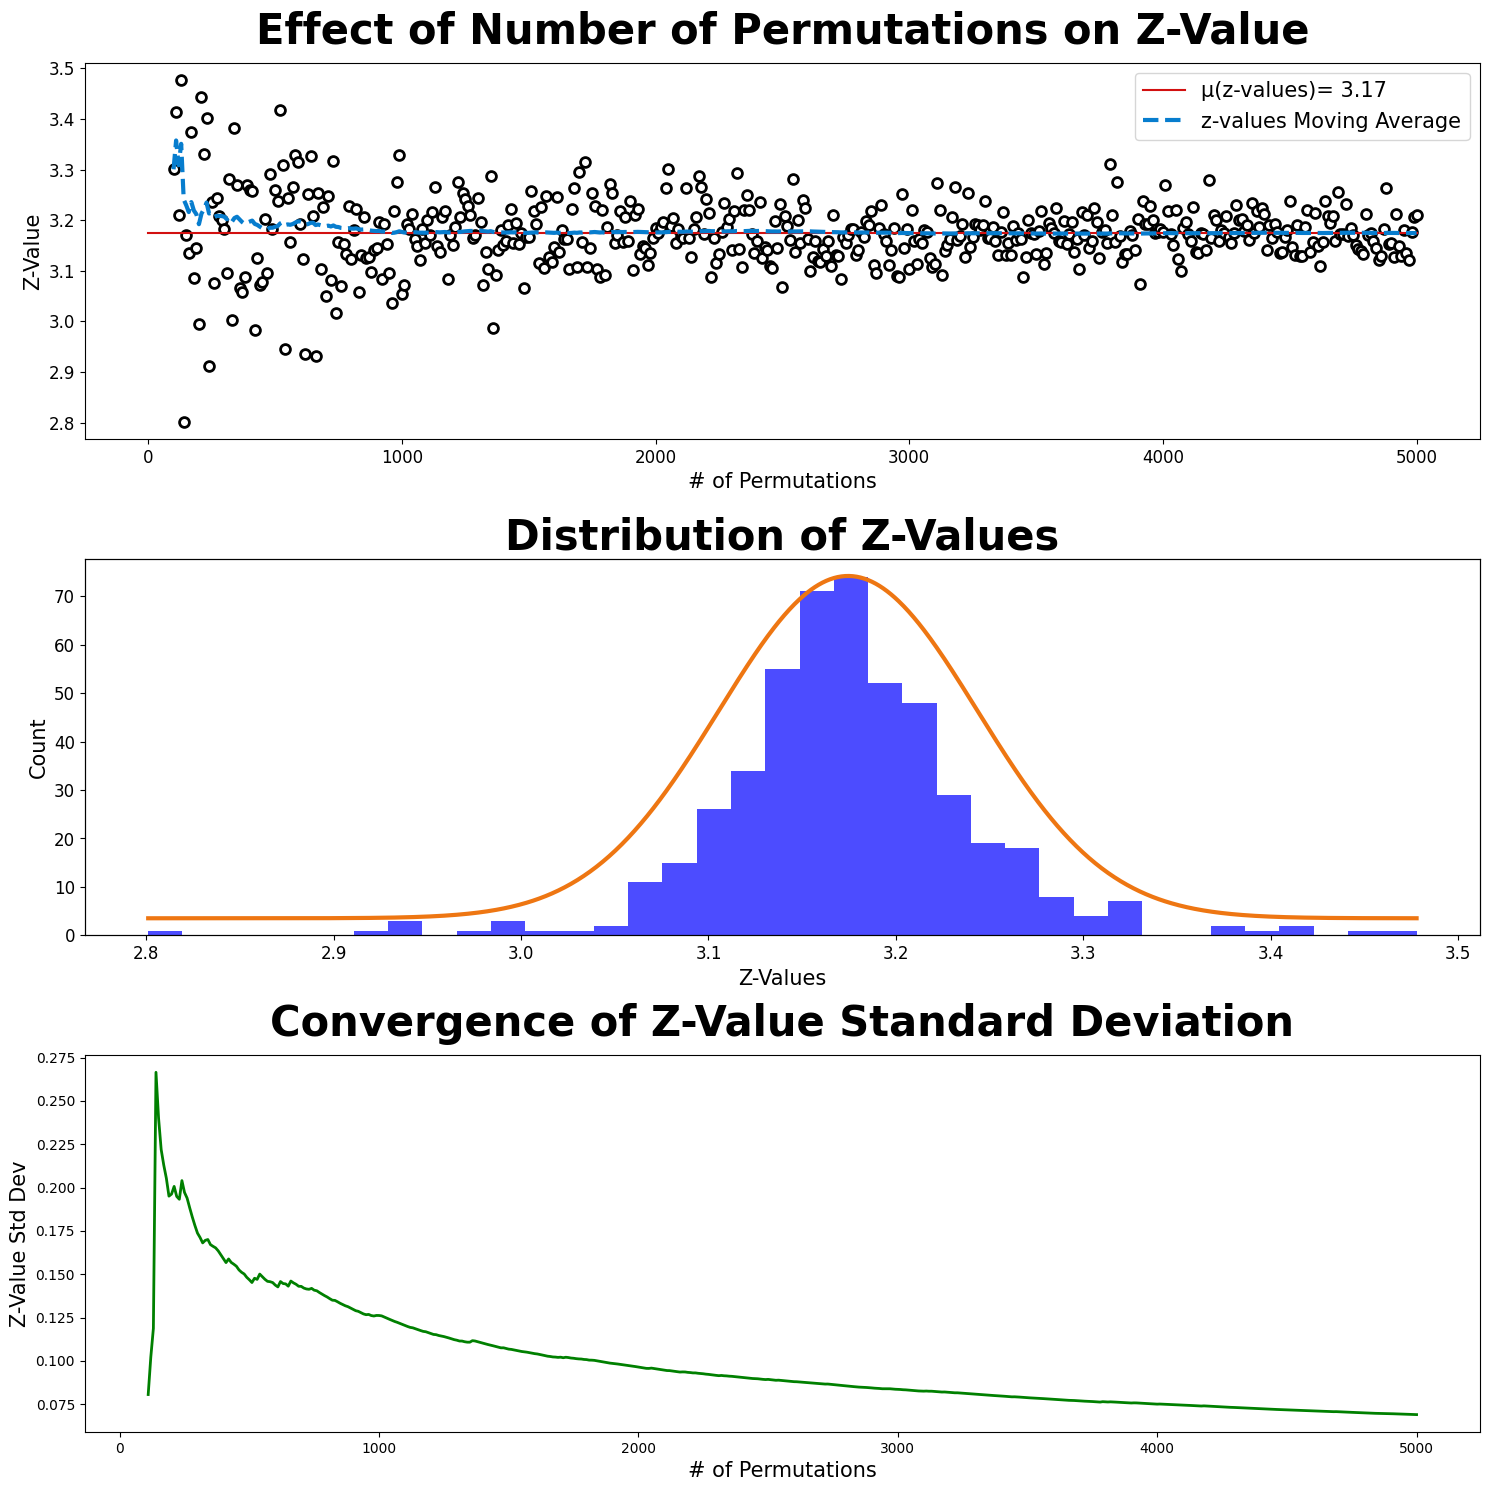

In [33]:

def plot_zscores(data_1, data_2, permutations):
    all_data = np.hstack((data_1, data_2))
    conditions = np.hstack((np.ones(len(data_1)), 2 * np.ones(len(data_2))))
    observed_diff = np.mean(data_2) - np.mean(data_1)

    # Initialize arrays to store z-values and std deviations
    z_values = np.zeros(len(permutations))
    z_values_ma = np.zeros(len(permutations))
    z_std_dev = np.zeros(len(permutations))  # Store standard deviation of z-values at each step

    for i, perms in enumerate(permutations):
        perm_diffs = np.zeros(perms)

        for perm_i in range(perms):
            fconds = np.random.permutation(len(all_data))
            fconds[fconds < len(data_1)] = 1
            fconds[fconds >= len(data_1)] = 2
            perm_diffs[perm_i] = np.mean(all_data[fconds == 2]) - np.mean(all_data[fconds == 1])

        # Calculate z-value for current set of permutations
        z_val = (observed_diff - np.mean(perm_diffs)) / np.std(perm_diffs, ddof=1)
        z_values[i] = z_val
        z_values_ma[i] = np.mean(z_values[:i+1])  # Moving average of z-values
        z_std_dev[i] = np.std(z_values[:i+1], ddof=1)  # Track std deviation as it converges

    # Get statistics for z-values
    zval_mean = np.mean(z_values)
    zval_std = np.std(z_values, ddof=1)
    zval_min = np.min(z_values)
    zval_max = np.max(z_values)

    # Plot results
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

    # Scatter plot for z-values and moving average
    ax1.scatter(permutations, z_values, s=50, c='white', edgecolors='k', linewidths=2)
    ax1.plot([0, permutations[-1]], [zval_mean, zval_mean], color='#D21010', label=f'μ(z-values)= {np.round(zval_mean, 2)}')
    ax1.plot(permutations, z_values_ma, color='#077DCE', linewidth=3, linestyle='--', label='z-values Moving Average')
    ax1.set_xlabel('# of Permutations', fontsize=15)
    ax1.set_ylabel('Z-Value', fontsize=15)
    ax1.set_title('Effect of Number of Permutations on Z-Value', fontsize=30, fontweight='semibold', y=1.03)
    ax1.tick_params(labelsize=12)
    ax1.legend(fontsize=15)

    # Histogram for z-values distribution
    ax2.hist(z_values, 'fd', color='b', alpha=0.7)
    ax2.set_xlabel('Z-Values', fontsize=15)
    ax2.set_ylabel('Count', fontsize=15)
    ax2.set_title('Distribution of Z-Values', fontsize=30, fontweight='semibold')
    ax2.tick_params(labelsize=12)

    # Overlay normal distribution
    ax3 = ax2.twinx()
    xx = np.linspace(zval_min, zval_max, 1000)
    yy = stats.norm.pdf(xx, loc=zval_mean, scale=zval_std)
    ax3.plot(xx, yy, color='#EE7612', linewidth=3)
    ax3.set_yticks([])

    # Plot standard deviation of z-values to visualize plateau effect
    ax3 = plt.subplot(3, 1, 3)
    ax3.plot(permutations, z_std_dev, color='green', linewidth=2)
    ax3.set_xlabel('# of Permutations', fontsize=15)
    ax3.set_ylabel('Z-Value Std Dev', fontsize=15)
    ax3.set_title('Convergence of Z-Value Standard Deviation', fontsize=30, fontweight='semibold', y=1.03)

    fig.tight_layout()
    plt.show()


# Generate two datasets A and B
N = 100
r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
dataA = 26 - r * 10

r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
dataB = 30 - r * 10

# Run the plot function with 100 to 5000 permutations
plot_zscores(dataA, dataB, np.arange(100, 5001, 10))